<a href="https://colab.research.google.com/github/SaraKarim23/-Python-for-Extragalactic-Astronomy/blob/main/Basic_Plotting_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Basic Plotting in Astronomy Research

In astronomy, data is often collected from various sources such as telescopes, satellites, and simulations, generating vast amounts of complex information. To make sense of this data, researchers use plotting techniques to visualize relationships, trends, and physical phenomena in a way that is both intuitive and meaningful.

#### **Why Plotting is Essential in Astronomy:**
- **Data Interpretation:** Astronomical datasets are often large, multidimensional, and filled with noise. Plotting allows us to extract key features, highlight trends, and identify patterns that might otherwise remain hidden.
- **Understanding Physical Phenomena:** Whether it's the relationship between a star's temperature and luminosity or the structure of a galaxy, plots help visualize and better understand the physical processes underlying these phenomena.
- **Error Analysis:** Plots provide a way to visually inspect and correct errors in data, such as outliers, calibration issues, or inconsistencies in measurements.
- **Communication of Findings:** Visualization is a powerful tool for communicating complex results. Astronomical plots, whether they represent spectra, light curves, or images, make it easier for researchers and the public to grasp important findings in a digestible format.

#### **Helpful Resources to learn more about plotting-**
- [**Quick Start Guide on `matplotlib`**](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start-guide)
- [**Plotting and Images with `matplotlib` for Astronomers**](https://python4astronomers.github.io/plotting/matplotlib.html)
- [**Astronomical Data Visualization with Python**](https://allendowney.github.io/AstronomicalData/07_plot.html)

### Import Required Libraries
- #### `numpy`—For numerical operations like creating arrays and handling data

- #### `matplotlib`—The primary library for creating static, animated, and interactive plots.

- #### `astropy`—Commonly used in astronomy for handling physical quantities with units, ensuring correct calculations (e.g., distance, time, mass)

- #### `pandas`—For handling and analyzing tabular data efficiently

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd

## Let's Learn about Plotting with [H-R Diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram)

[You can download the following CSV file from here](https://drive.google.com/file/d/1dqp2_Ko3kqVZ61XsbYMoPtGsKjUM4BbQ/view?usp=drive_link)

In [2]:
# Loading Data from CSV file
hr_data = pd.read_csv('HRlab_brightest.csv')

# To access a specific column of the table
parallax = hr_data['Parallax']
star_name = hr_data['STAR']
intensity = hr_data['I']
color_index = hr_data['B-V']

hr_data

,STAR,B-V,Parallax,I
0,the Eri A,0.14,0.035,0.002916
1,rho Pup,0.43,0.035,0.005162
2,zet Hya,1.00,0.035,0.003880
3,mu UMa,1.59,0.035,0.004100
4,eta UMa,-0.19,0.035,0.012268
...,...,...,...,...
96,tau Cet,0.72,0.287,0.002709
97,alp CMi A,0.42,0.292,0.047950
98,alp CMa A,0.00,0.378,0.261090
99,alp Cen B,0.88,0.750,0.019989


In this table, the following columns are included:
- **STAR**: the name of the star.
- [**B-V**](https://en.wikipedia.org/wiki/Color_index): the color index of the star.
- [**Parallax**](https://en.wikipedia.org/wiki/Parallax): the measured parallax of the star in arcsec.
- **I**: the measured intensity of the star in $L_\odot$/pc$^2$.

### Obtain the required values ([distance](https://cas.sdss.org/dr2/en/proj/advanced/hr/hipparcos2.asp#:~:text=d%20%3D%201%2Fp%2C,parallax%20angle%20in%20arc%20seconds.), [luminosity](https://en.wikipedia.org/wiki/Luminosity), temperature) for plotting the H-R diagram

##### Astronomers use colors to determine the **temperatures** of stars. Remember that a **hotter star** appears **bluer**, while a **cooler star** appears **redder**. The color index **'B-V'** indicates how much **excess blue** color a star has compared to the red. Here, we provide the **formula** that allows you to **convert the color index to temperature**. To use this formula, you need to **call the function** (calculate_temperature_from_color) below!

In [3]:
# Calculate distance from parallax (distance in parsecs)
distance = 1 / parallax

# Luminosity formula (L = I * 4 * π * d²)
luminosity = intensity * 4 * np.pi * distance**2

# Function to calculate temperature from color index (B-V)
def calculate_temperature_from_color(color_index):
    return 4600 * (1 / (0.92 * color_index + 1.7) + 1 / (0.92 * color_index + 0.62))

# Compute temperature using the function
temperature = calculate_temperature_from_color(color_index)

### Basics of Plot Customization

- ##### `plt.figure(figsize=(8, 6))` is used to create a new figure (plot) with a specific size. The figsize parameter takes a tuple (width, height) in inches. `figsize=(8, 6)`: The plot will have a width of 8 inches and a height of 6 inches.

- ##### `plt.title('XXX')`: This sets the title for the plot. You can provide a descriptive text that explains what the plot represents, making it more informative for the viewer.

- ##### `plt.xlabel('XXX')`: This labels the x-axis, describing what the y-axis represents.

- ##### `plt.ylabel('XXX')`: This labels the y-axis, describing what the y-axis represents.

- ##### `plt.gca().invert_xaxis()` inverts the x-axis

- ##### `plt.gca().invert_yaxis()` inverts the y-axis

- ##### `plt.xlim()` to set the x-axis limit

- ##### `plt.ylim()` to set the y-axis limit

- ##### `plt.xscale('log')` apply the logarithmic scale to the x axe
- ##### `plt.yscale('log')` apply the logarithmic scale to the y axe
- ##### `plt.grid(True)`: This command enables the grid lines on the plot.
- ##### `plt.show()` displays the plot.


### Create a Basic Plot
- #### `plt.plot()` to create a line plot with points. The parameters are below-
- #####  `x`: x-coordinates of the points (array-like).

- ##### `y`: y-coordinates of the points (array-like).

- ##### `color` or `c`: Color of the line or points (string or array-like).

- ##### `linestyle` or `ls`: Line style (string, e.g., '-', '--', ':').

- ##### `linewidth` or `lw`: Width of the line (scalar).

- ##### `marker`: Marker style for data points (string, e.g., 'o', 'x', 's').

- ##### `markersize` or `ms`: Size of the markers (scalar).

- ##### `alpha`: Transparency of the line or markers (scalar between 0 and 1).

- ##### `label`: Label for the legend (string).

Some of these parameters are optional and used for styling the plot, such as defining line styles, marker types, and colors.

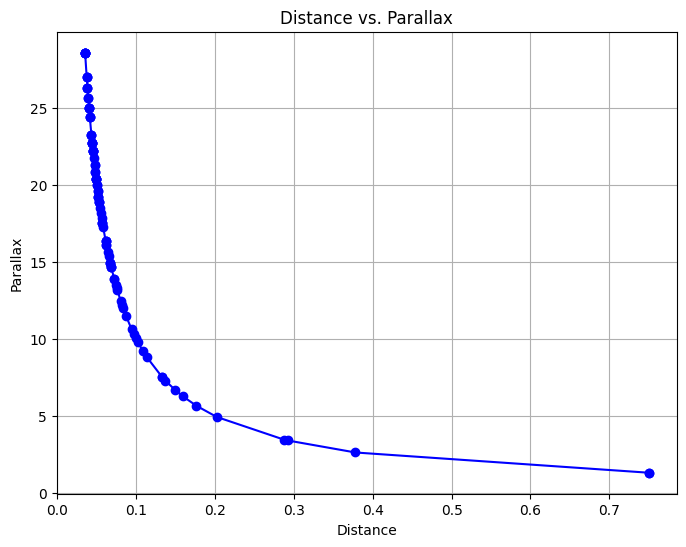

In [4]:
# Plotting the data
plt.figure(figsize=(8, 6))  # Set the size of the plot

# Plot distance vs parallax with magenta circles and lines
plt.plot(parallax, distance, 'bo-', label='Star Data')  # 'bo-' means blue circles connected by lines

plt.title('Distance vs. Parallax')  # Add a title to the plot
plt.xlabel('Distance')              # Label for x-axis
plt.ylabel('Parallax')              # Label for y-axis

plt.grid(True)            # Add a grid for better readability
plt.show()

## Task 1
- Please try plotting various combinations, such as:
  - **B-V vs. Parallax**
  - **Distance vs. Luminosity**
  - **B-V vs. Temperature**
  - **Parallax vs. Intensity**
  - **Luminosity vs. Temperature**

- Feel free to experiment with additional pairings to explore the relationships between them.

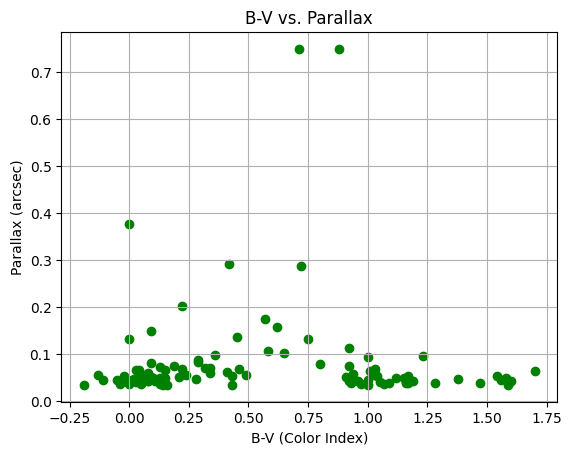

In [5]:
plt.figure()
plt.scatter(color_index, parallax, color='green')
plt.title('B-V vs. Parallax')
plt.xlabel('B-V (Color Index)')
plt.ylabel('Parallax (arcsec)')
plt.grid(True)
plt.show()

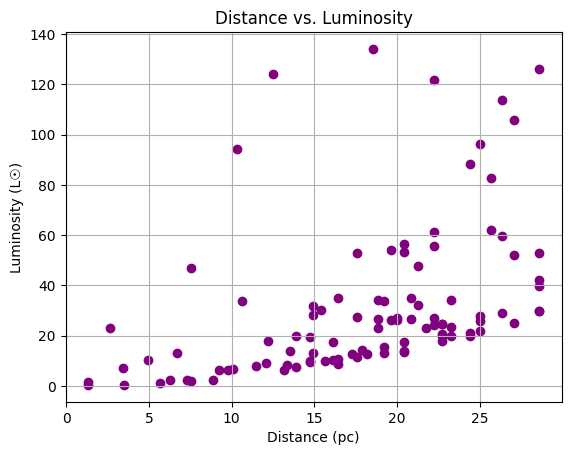

In [6]:
plt.figure()
plt.scatter(distance, luminosity, color='purple')
plt.title('Distance vs. Luminosity')
plt.xlabel('Distance (pc)')
plt.ylabel('Luminosity (L☉)')
plt.grid(True)
plt.show()


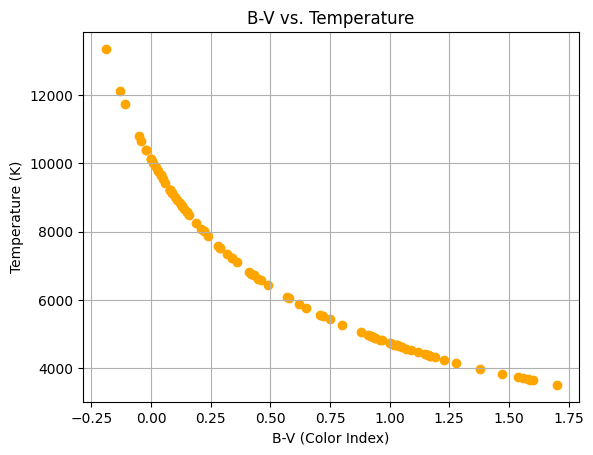

In [7]:
plt.figure()
plt.scatter(color_index, temperature, color='orange')
plt.title('B-V vs. Temperature')
plt.xlabel('B-V (Color Index)')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.show()


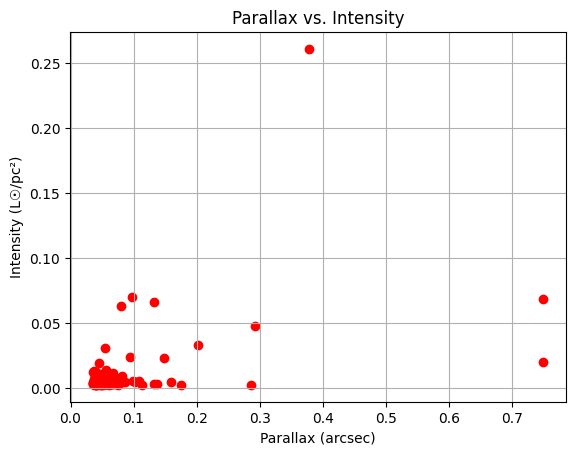

In [9]:
plt.figure()
plt.scatter(parallax, intensity, color='red')
plt.title('Parallax vs. Intensity')
plt.xlabel('Parallax (arcsec)')
plt.ylabel('Intensity (L☉/pc²)')
plt.grid(True)
plt.show()



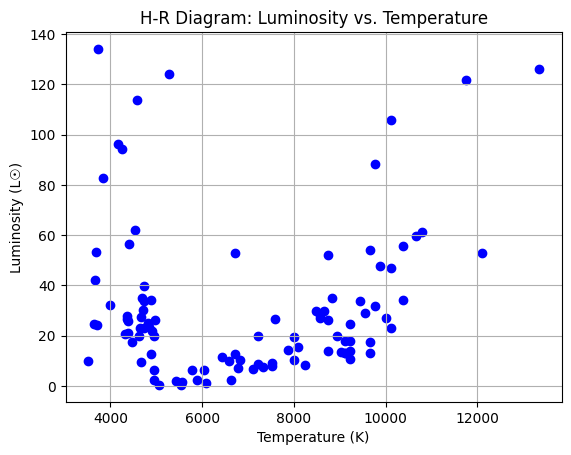

In [12]:
plt.figure()
plt.scatter(temperature, luminosity, color='blue')
plt.title('H-R Diagram: Luminosity vs. Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L☉)')
plt.grid(True)
plt.show()


## Create a Scatter Plot
- #### `plt.scatter()` to create a scatter plot. The parameters are below-
- ##### `x`: x-coordinates of the points (array-like).

- ##### `y`: y-coordinates of the points (array-like).

- ##### `color` or `c`: Color(s) of the points (string or array-like).

- ##### `marker`: Shape of the points (string, e.g., 'o', 'x').

- ##### `s`: Size of the points (scalar or array-like).

- ##### `edgecolor`: Color of the edges of the markers (string or array-like).

- ##### `alpha`: Transparency of the points (scalar between 0 and 1).

- ##### `cmap`: Colormap for color scaling when c is array-like. Only relevant if you are using a colormap.

- ##### `label`: Label for the legend (string).

- ##### `linewidths`: Width of the marker edge lines (scalar).

Some of these parameters are optional and used for styling the plot, such as defining line styles, marker types, and colors.

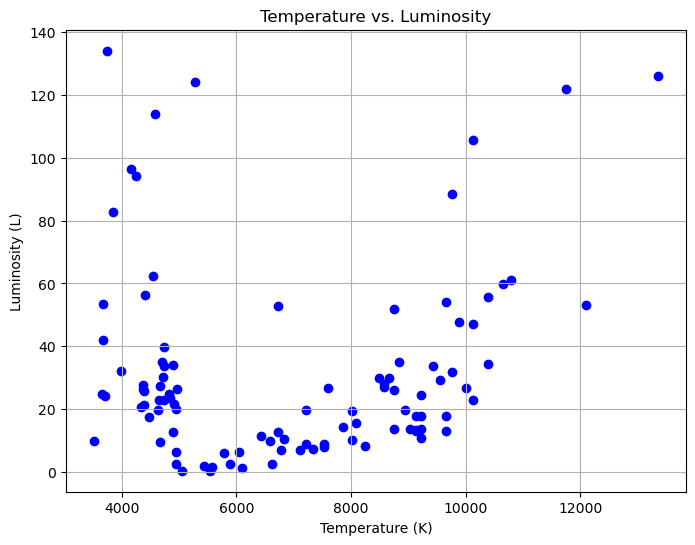

In [ ]:
# Creating a scatter plot
plt.figure(figsize=(8, 6))  # Set the size of the plot (8 inches wide by 6 inches high)

# Create a scatter plot with temperature on the x-axis and luminosity on the y-axis
plt.scatter(temperature, luminosity, color='blue', label='Data')

# Set the title of the plot
plt.title('Temperature vs. Luminosity')

# Label for the x-axis
plt.xlabel('Temperature (K)')

# Label for the y-axis, indicating Luminosity in terms of Solar luminosity
plt.ylabel('Luminosity (L)')

# Enable the grid lines on the plot for better readability
plt.grid(True)

# Show the plot
plt.show()

## Task 2
- #### Modify the given scatter plot above code to invert the x-axis and apply logarithmic scaling to the y-axis. You can change the y-label and plot title accordingly.
- #### The output should look like this which is our desired H-R diagram-

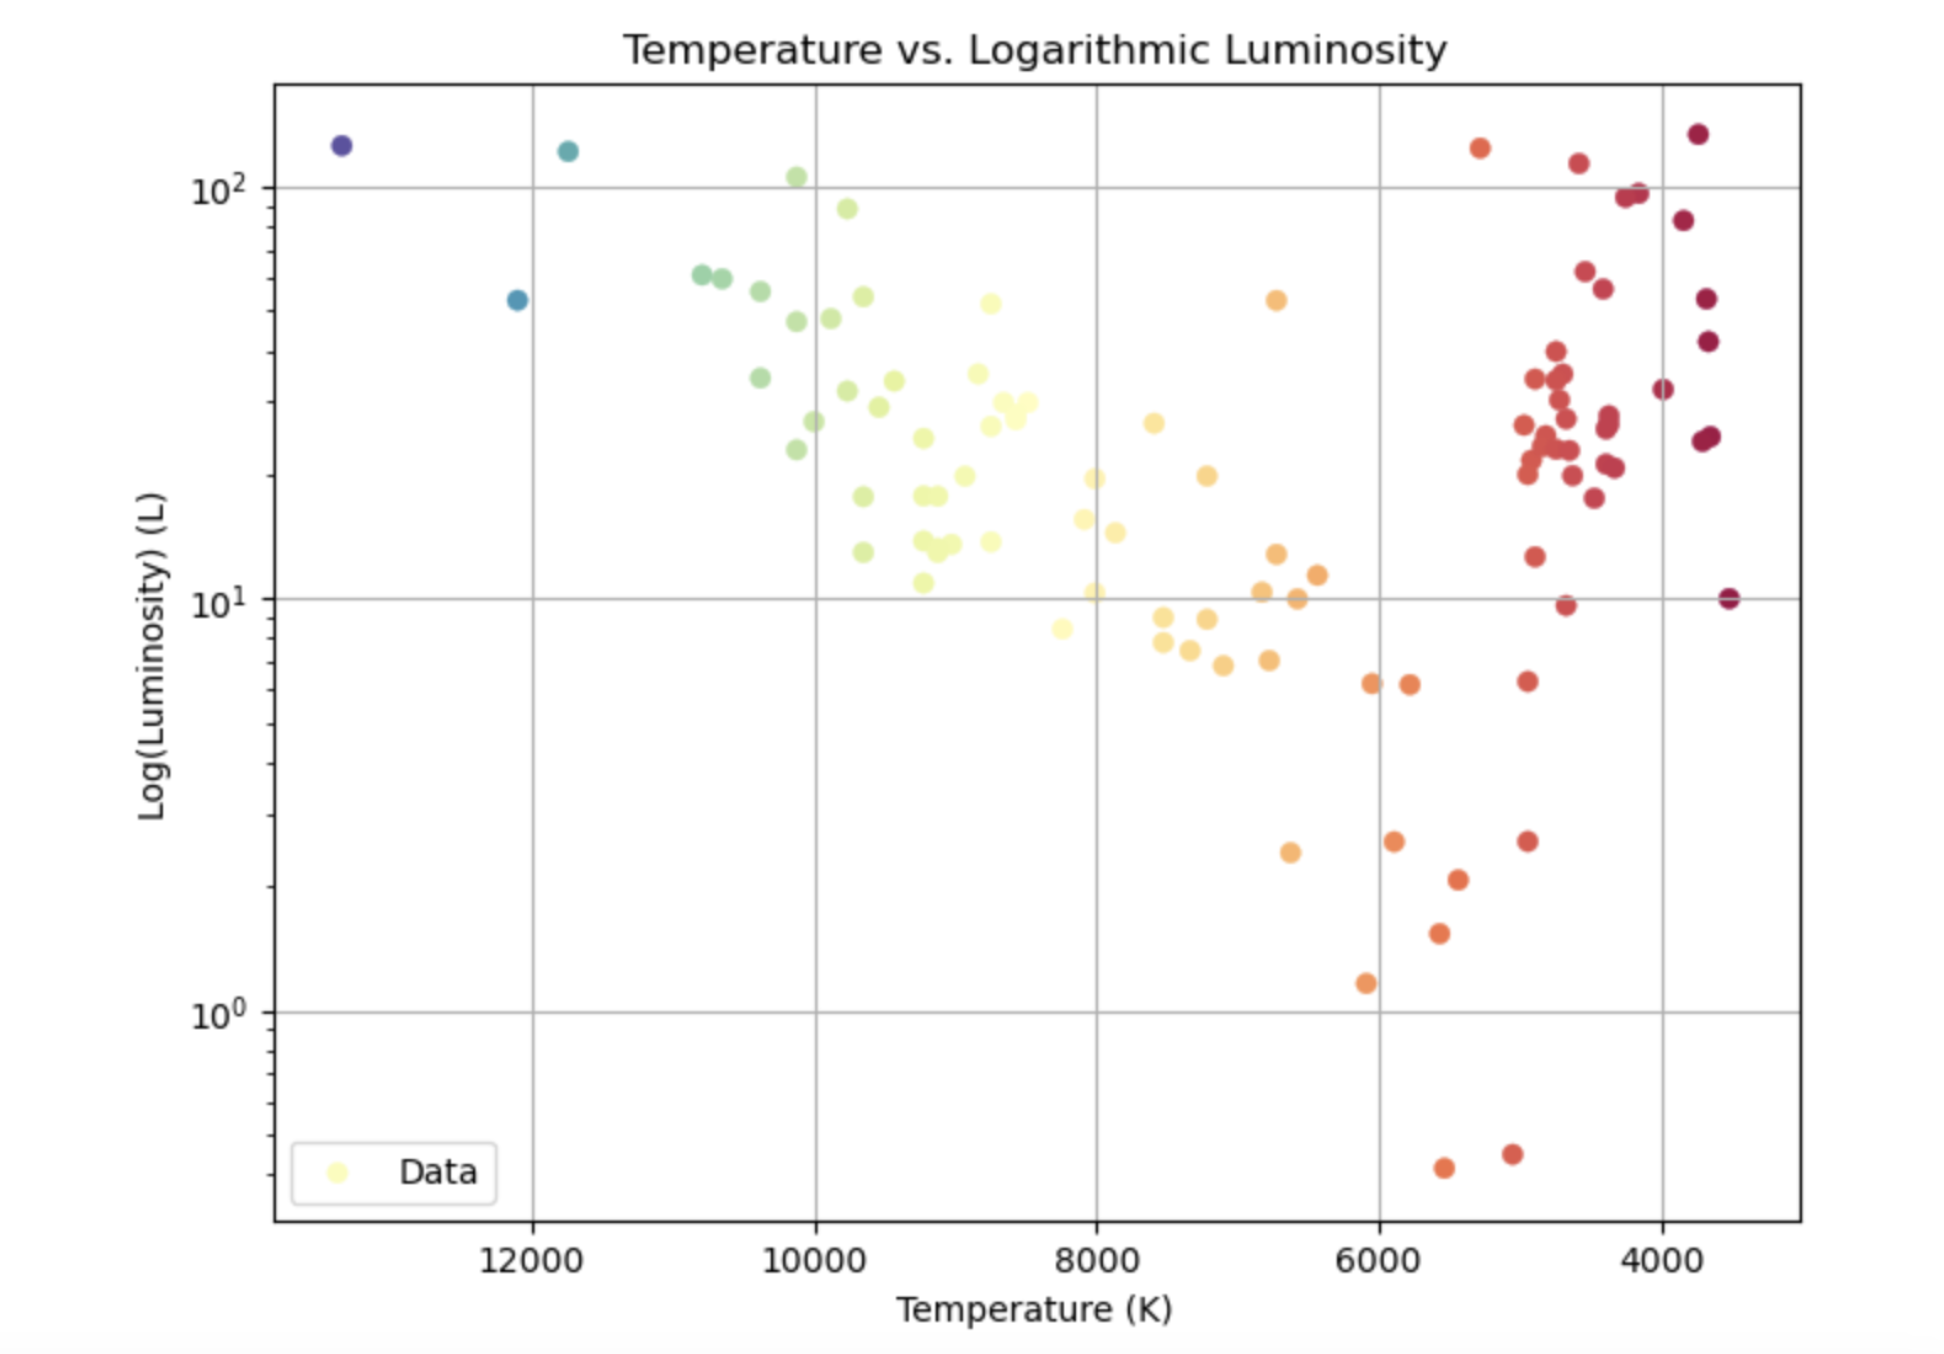
- Colormap used here: `cmap='Spectral'`

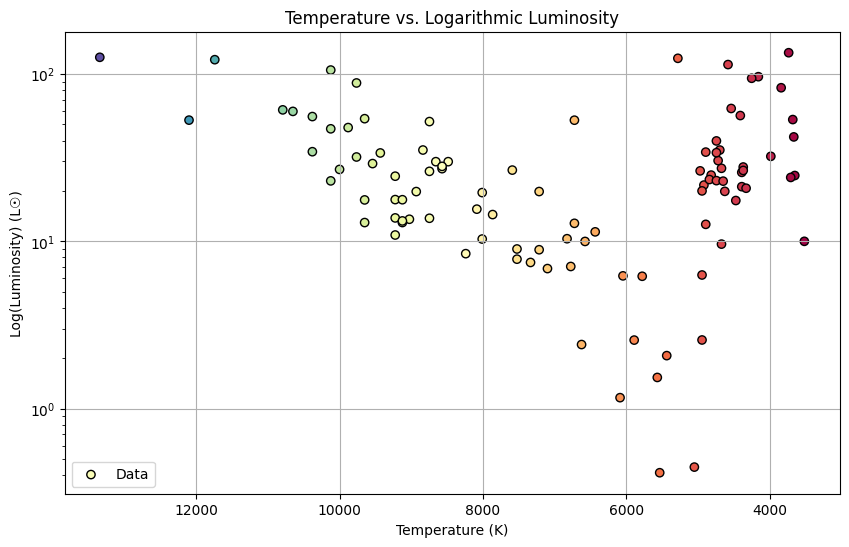

In [14]:
import matplotlib.pyplot as plt

# Create the H-R diagram with color mapping
plt.figure(figsize=(10, 6))

# Scatter plot using colormap (cmap='Spectral')
scatter = plt.scatter(
    temperature, luminosity,
    c=temperature, cmap='Spectral', edgecolor='k', label='Data'
)

# Plot labels and title
plt.title('Temperature vs. Logarithmic Luminosity')
plt.xlabel('Temperature (K)')
plt.ylabel('Log(Luminosity) (L☉)')

# Logarithmic y-axis for wide luminosity range
plt.yscale('log')

# Invert x-axis for H-R diagram (hotter stars on the left)
plt.gca().invert_xaxis()
#gca stands for Get Current Axes. It returns the current axes object of the plot I am working with, allowing me to directly modify axis properties like limits, scale, direction, etc.
# Grid for readability
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()


### Task 2.1
- #### Modify the code again to display only the data points within the specified area (outlined by the red box) on the plot.
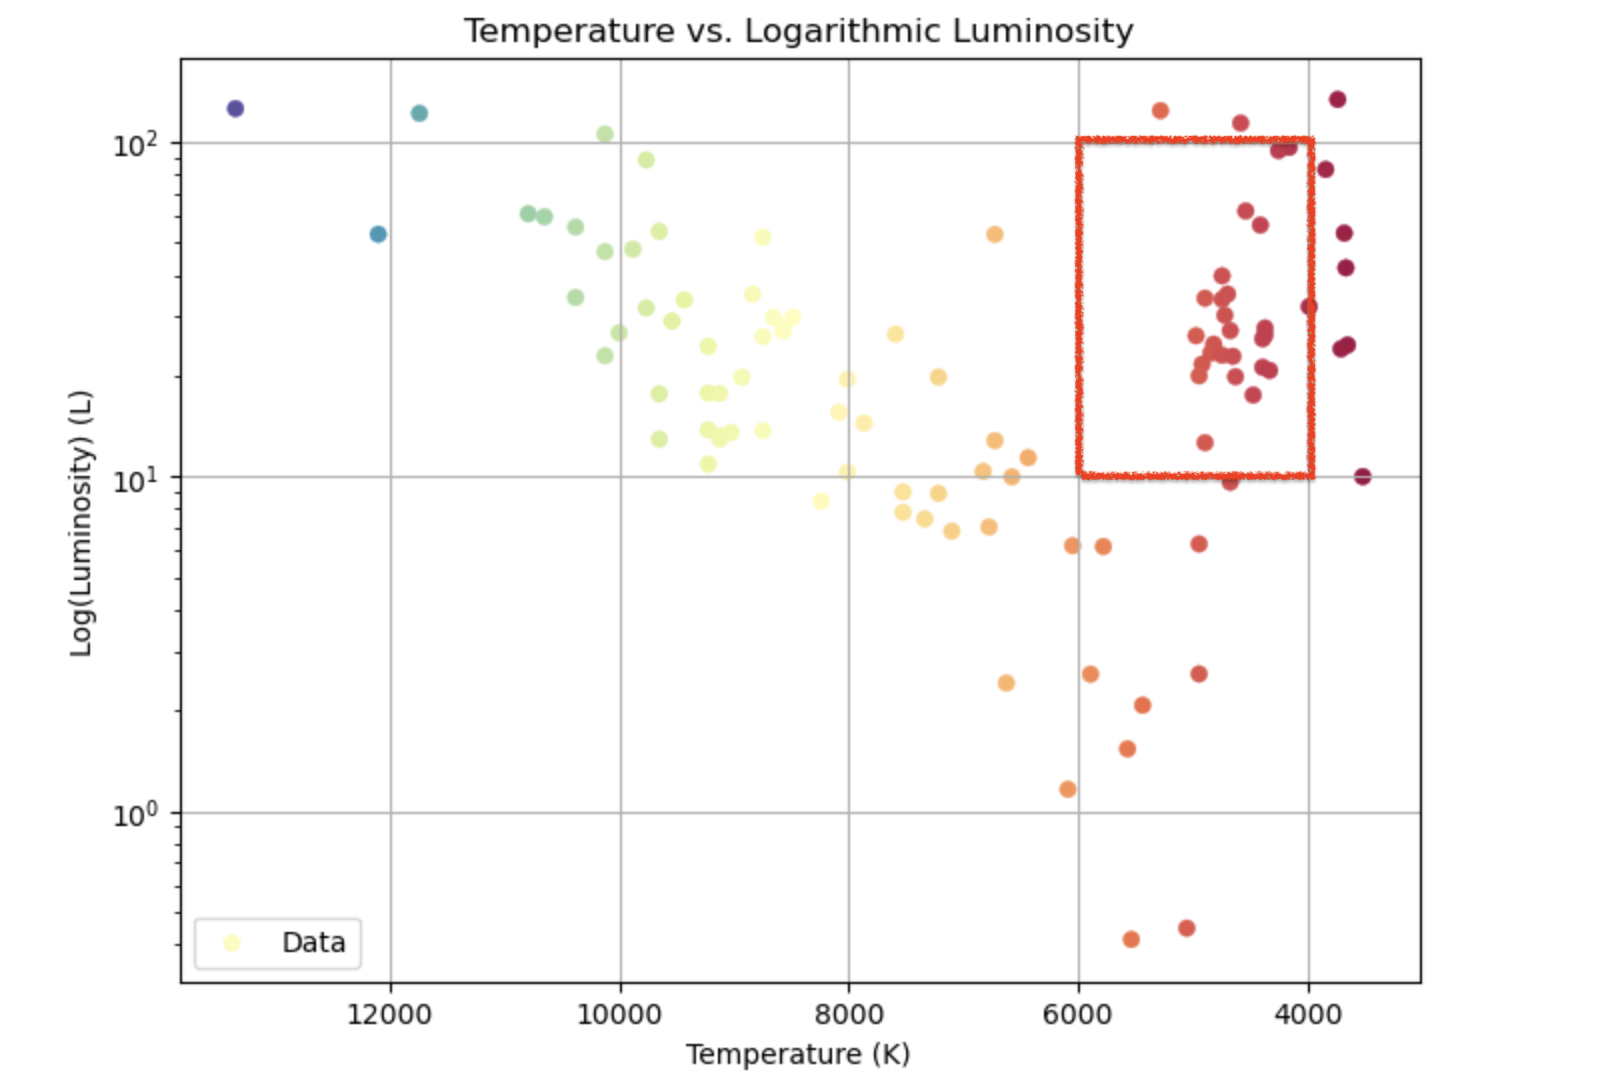

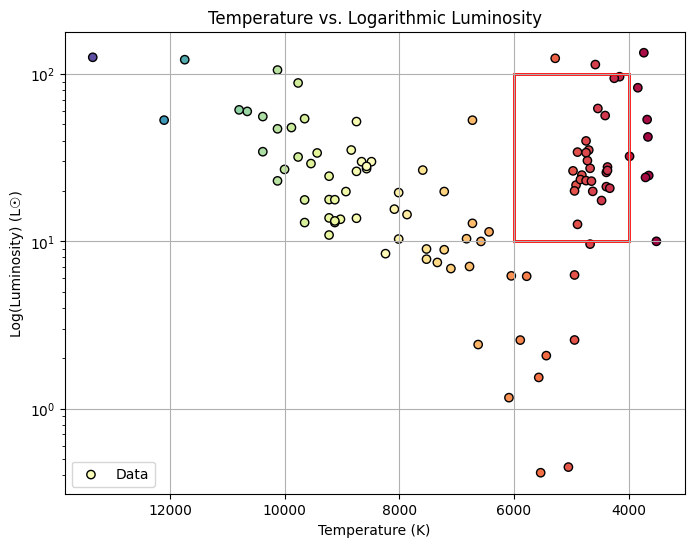

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Plot all data points
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    temperature,
    luminosity,
    c=temperature,
    cmap='Spectral',
    edgecolor='k',
    label='Data'
)

# Invert the x-axis and apply log scale to y-axis
plt.gca().invert_xaxis()
plt.yscale('log')

# Highlight the red box area (approx range from image)
# Temperature between 3800 and 5600 K, Luminosity between 10 and 200
red_box = patches.Rectangle(
    (4000, 10),         # bottom-left corner (x, y)
    2000,               # width = 5600 - 3800
    90,                # height = 200 - 10
    linewidth=2,
    edgecolor='red',
    facecolor='none',
    linestyle='-'
)

# Add the red box to the plot
plt.gca().add_patch(red_box)

# Add labels and title
plt.title('Temperature vs. Logarithmic Luminosity')
plt.xlabel('Temperature (K)')
plt.ylabel('Log(Luminosity) (L☉)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Create a Histogram
- #### `plt.hist()` to create a histogram. The parameters are below-
- ##### `x`: The data to be plotted (array-like).
- ##### The `bins=10` argument specifies 10 bins to group the data into.
- ##### `alpha=0.7` - 70% opacity (30% transparency), `alpha=1.0` (completely opaque, with no transparency), `alpha=0.0` (the bars will be fully transparent (invisible)
- ##### `density`: If True, scales the histogram to form a probability density (boolean).
- ##### `color`: Color(s) for the bars (string or array-like).
- ##### `edgecolor`: Color of the bars' edges (string).
- ##### `label`: Label for the legend (string).

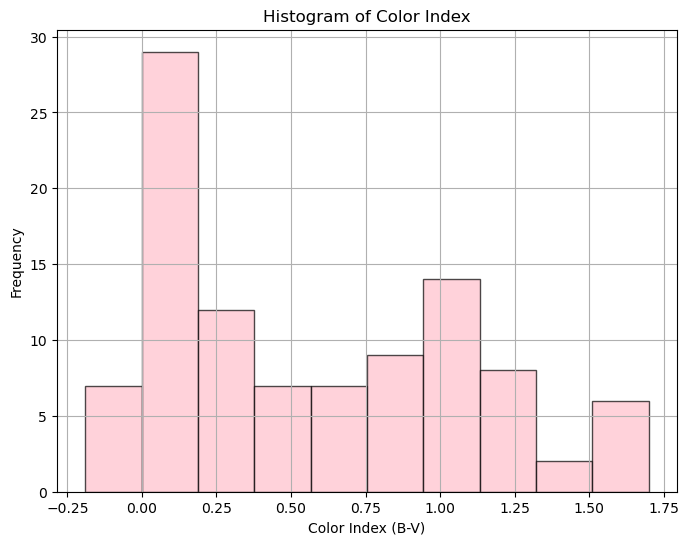

In [ ]:
# Plotting a histogram
plt.figure(figsize=(8, 6))
plt.hist(color_index, bins=10, color='pink', edgecolor='black', alpha=0.7, density=False)
plt.title('Histogram of Color Index')
plt.xlabel('Color Index (B-V)')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.grid(True)
plt.show()

### Plotting an Astronomical Image
- #### `plt.imshow()`: Displays the 2D array as an image. The parameters are below—

- ##### `X` → (Required) The image data (NumPy array, PIL image, etc.).

- ##### `cmap` → Sets the colormap (e.g., 'gray', 'inferno', 'viridis').

- ##### `norm` → Normalizes pixel values (e.g., matplotlib.colors.Normalize()).

- ##### `aspect` → Controls aspect ratio ('auto', 'equal', or a numerical value).

- ##### `interpolation` → Defines how pixels are interpolated ('nearest', 'bilinear', 'bicubic', etc.).

- ##### `alpha` → Adjusts transparency (0 = fully transparent, 1 = fully opaque).

- ##### `vmin`, `vmax` → Set minimum and maximum data values for scaling.

- ##### `origin` → Sets the coordinate origin ('upper' or 'lower').

- ##### `plt.colorbar()`: Adds a color scale to interpret intensity values.

##### [You can learn about more parameters here!](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow)


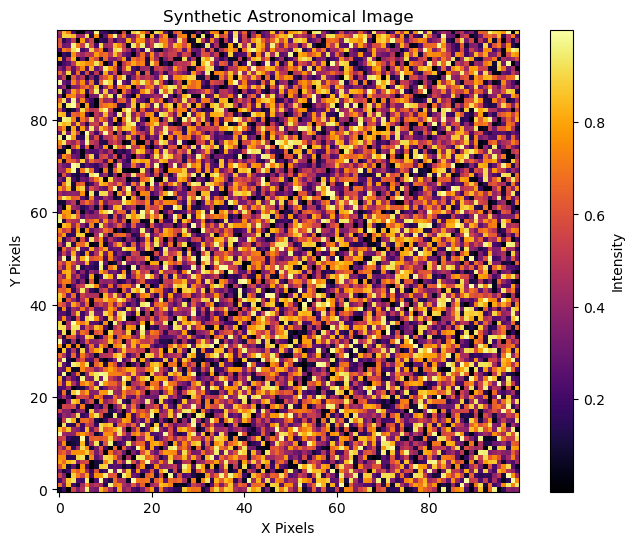

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a synthetic 2D image (e.g., a simulated galaxy brightness distribution)
image_data = np.random.rand(100, 100)  # 100x100 array with random values (simulating noise)

# Displaying the image using imshow
plt.figure(figsize=(8, 6))
plt.imshow(image_data, cmap='inferno', origin='lower')

# Adding labels and title
plt.colorbar(label='Intensity')  # Colorbar to show scale
plt.title('Synthetic Astronomical Image')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

plt.show()

## Task 3
- #### [Download the fits file here](https://drive.google.com/file/d/14nQaNwoz1S2PkLY7A158NHsV21RVauxi/view?usp=drive_link) and then open and visualize it using `plt.imshow()` with different parameters discussed above. If you are unsure how to open a fits file, check the "Fits File Handling" notebook.

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  150                                                  NAXIS2  =                  150                                                  WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =                251.5 / Pixel coordinate of reference point            CRPIX2  =                167.5 / Pixel coordinate of reference point            PC1_1   = -1.1111111111111E-05 / Coordinate transformation matrix element       PC2_2   =  1.1111111111111E-05 / Coordinate transformation matrix element       CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  CUNIT1  = 'deg'                / Units o

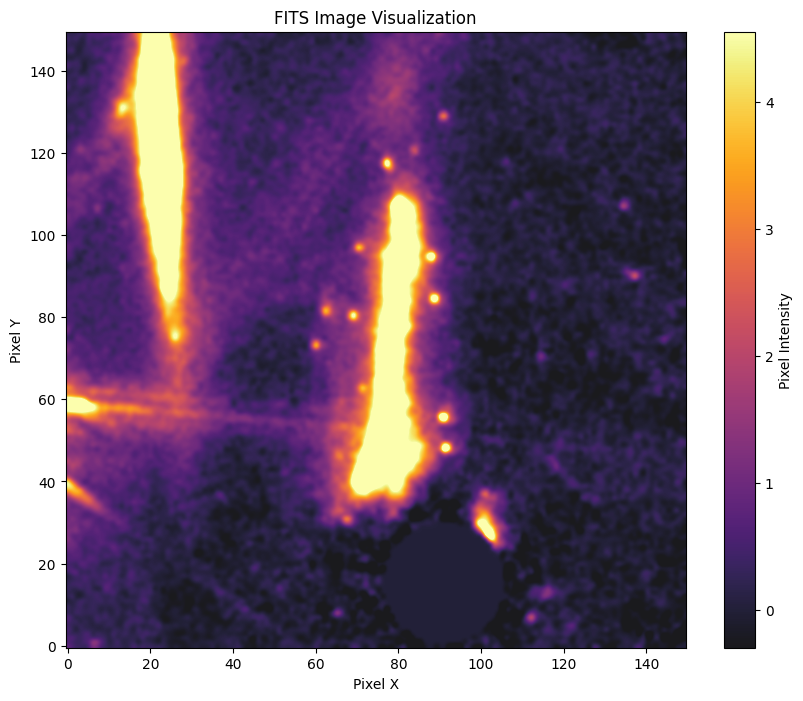

In [32]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import requests

hdulist = fits.open('sparkler_practice_fits_file.fits')
primary_hdu = hdulist[0]
print(primary_hdu.header)  # Prints the header information

image_data = primary_hdu.data
print(image_data.shape)  # Shows the dimensions of the image array

# Step 4: Display image using different parameters
plt.figure(figsize=(10, 8))
plt.imshow(image_data,
           cmap='inferno',
           origin='lower',
           interpolation='bicubic',
           aspect='auto',
           alpha=0.9,
           vmin=np.percentile(image_data, 5),
           vmax=np.percentile(image_data, 95))
plt.colorbar(label='Pixel Intensity')
plt.title("FITS Image Visualization")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()

### Plotting with Error Bar

- #### `xerr=magnitude_error`: To specify the horizontal error bars

- #### `yerr=magnitude_error`: To specify the vertical error bars

- #### `fmt='bo-'`: To specify the format of the data points. 'bo-' means blue circles with lines connecting them.

- #### `capsize=5`: To adds caps at the end of the error bars for better visualization.

- #### Error bars are plotted vertically (for magnitude) to represent measurement uncertainties in the vertical direction.

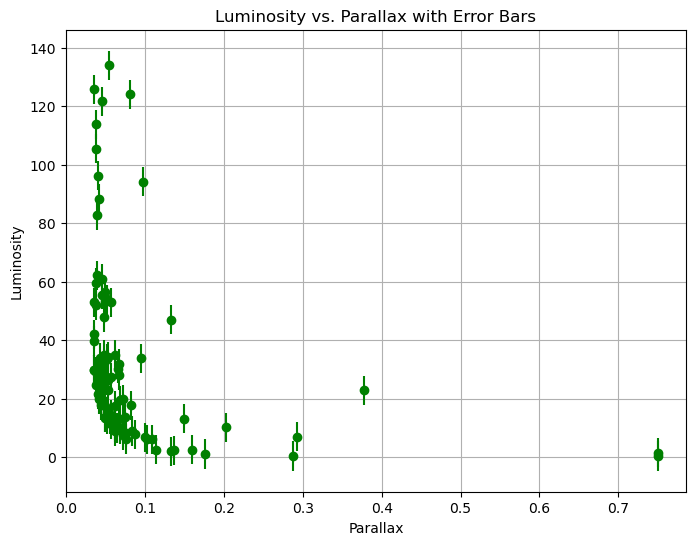

In [ ]:
# Plotting the data with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(parallax, luminosity, yerr=5, fmt='go')

# Title and labels
plt.title('Luminosity vs. Parallax with Error Bars')
plt.xlabel('Parallax')
plt.ylabel('Luminosity')

# Add grid
plt.grid(True)
plt.show()